# Assignment 8: DT

<ol>
    <li><strong>Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <li><strong>The hyper paramter tuning (best `depth` in range [1, 5, 10, 50], and the best `min_samples_split` in range [5, 10, 100, 500])</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation(use gridsearch cv or randomsearch cv)/simple cross validation data(you can write your own for loops refer sample solution)</li>
        </ul>
    </li>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/Gp2DQmh.jpg' width=500px> with X-axis as <strong>min_sample_split</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/fgN9aUP.jpg' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>n_estimators</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You choose either of the plotting techniques out of 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://i.imgur.com/wMQDTFe.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='https://i.imgur.com/IdN5Ctv.png' width=300px></li>
    <li>Once after you plot the confusion matrix with the test data, get all the `false positive data points`
        <ul>
            <li> Plot the WordCloud(https://www.geeksforgeeks.org/generating-word-cloud-python/) with the words of essay text of these `false positive data points`</li>
            <li> Plot the box plot with the `price` of these `false positive data points`</li>
            <li> Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`</li>
        </ul>
        </ul>
    </li>
   <li><b>Task 2: </b>For this task consider set-1 features. Select all the features which are having non-zero feature importance.You can get the feature importance using  'feature_importances_` 
   (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), discard the all other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM), you need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3<br>
  Note: when you want to find the feature importance make sure you don't use max_depth parameter keep it None.
  </li>
    <br>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

In [1]:
import nltk
nltk.downloader.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# import nltk
# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
nannan'
ss = sid.polarity_scores(for_sentiment)

for k in ss:
    print('{0}: {1}, '.format(k, ss[k]), end='')

# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Krithika.WINDOWS-
[nltk_data]     CVA0M52\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


neg: 0.01, neu: 0.745, pos: 0.245, compound: 0.9975, 

<h1>1. Decision Tree </h1>

## 1.1 Loading Data

In [2]:
#loading data
import pandas as pd
import pickle
data = pd.read_csv(r'C:\Users\Krithika.WINDOWS-CVA0M52\Desktop\AppliedAI\Decision_Tree\preprocessed_data.csv')
more_data = pd.read_csv(r'C:\Users\Krithika.WINDOWS-CVA0M52\Desktop\AppliedAI\Decision_Tree\train_data.csv')
#more_data.head(3)
data['project_title'] = more_data['project_title']
data.head(3)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price,project_title
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05,Educational Support for English Learners at Home
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03,Wanted: Projector for Hungry Learners
2,ca,mrs,grades_prek_2,10,1,literacy_language,literacy,having class 24 students comes diverse learner...,329.00,Soccer Equipment for AWESOME Middle School Stu...


In [3]:
#essay scores are calculated
neg_list = [];
neu_list = [];
pos_list=[];
compound_list=[];
for i in data['essay']:
    val = sid.polarity_scores(i)
    neg_list.append(val['neg'])
    neu_list.append(val['neu'])
    pos_list.append(val['pos'])
    compound_list.append(val['compound'])

In [4]:
#adding the essay scores to dataframe
data['neg'] = neg_list
data['neu'] = neu_list
data['pos'] = pos_list
data['compound'] = compound_list

In [5]:
#top rows of dataframe
data.head()

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price,project_title,neg,neu,pos,compound
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05,Educational Support for English Learners at Home,0.013,0.783,0.205,0.9867
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03,Wanted: Projector for Hungry Learners,0.072,0.680,0.248,0.9897
2,ca,mrs,grades_prek_2,10,1,literacy_language,literacy,having class 24 students comes diverse learner...,329.00,Soccer Equipment for AWESOME Middle School Stu...,0.017,0.721,0.262,0.9860
3,ga,mrs,grades_prek_2,2,1,appliedlearning,earlydevelopment,i recently read article giving students choice...,481.04,Techie Kindergarteners,0.030,0.783,0.187,0.9524
4,wa,mrs,grades_3_5,2,1,literacy_language,literacy,my students crave challenge eat obstacles brea...,17.74,Interactive Math Tools,0.029,0.683,0.288,0.9873


<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [37]:
#splitting the data
import numpy as np
from sklearn.model_selection import train_test_split
y=data['project_is_approved']
X=data.drop(['project_is_approved'],axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)
print(len(X_train)) #dimension of train data 
print(len(X_test)) #dimension of dataset prior to splitting


81936
27312


<h2>1.3 Make Data Model Ready: encoding essay, and project_title</h2>

In [6]:
#preprocessing essay, title
preprocessed_essays = data['essay'].values
preprocessed_title = data['project_title'].values
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer1 = TfidfVectorizer(min_df=10,ngram_range=(1,4), max_features=6000)
print("Before vectorizations:")
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

print("="*100)
vectorizer1.fit(X_train['essay'].values) # fit has to happen only on train data
# we use the fitted TfidfVectorizer to convert the text to vector
X_train_essay_tfidf = vectorizer1.transform(X_train['essay'].values)
X_test_essay_tfidf = vectorizer1.transform(X_test['essay'].values)
vocab_tfidf_essay = vectorizer1.vocabulary_

In [ ]:
with open(r'C:\Users\Krithika.WINDOWS-CVA0M52\Desktop\AppliedAI\Decision_Tree\pickle\1.pkl', 'wb') as f:
        pickle.dump(X_train_essay_tfidf, f)
with open(r'C:\Users\Krithika.WINDOWS-CVA0M52\Desktop\AppliedAI\Decision_Tree\pickle\3.pkl', 'wb') as f:
        pickle.dump(X_test_essay_tfidf, f)
with open(r'C:\Users\Krithika.WINDOWS-CVA0M52\Desktop\AppliedAI\Decision_Tree\pickle\4.pkl', 'wb') as f:
        pickle.dump(vocab_tfidf_essay, f)

In [56]:
#run this directly
import pickle
with open(r'C:\Users\Krithika.WINDOWS-CVA0M52\Desktop\AppliedAI\Decision_Tree\pickle\1.pkl', 'rb') as f:
    X_train_essay_tfidf = pickle.load(f)
with open(r'C:\Users\Krithika.WINDOWS-CVA0M52\Desktop\AppliedAI\Decision_Tree\pickle\3.pkl', 'rb') as f:
    X_test_essay_tfidf = pickle.load(f)   
with open(r'C:\Users\Krithika.WINDOWS-CVA0M52\Desktop\AppliedAI\Decision_Tree\pickle\4.pkl', 'rb') as f:
    vocab_tfidf_essay = pickle.load(f)    

In [ ]:
#shape of essay vectors tfidf
print("After vectorizations:")
print(X_train_essay_tfidf.shape, y_train.shape)
print(X_test_essay_tfidf.shape, y_test.shape)
print("="*100)

In [ ]:
vectorizer2 = TfidfVectorizer(min_df=10,ngram_range=(1,4), max_features=6000)
print("Before vectorizations:")
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

print("="*100)
vectorizer2.fit(X_train['project_title'].values) # fit has to happen only on train data
# we use the fitted TfidfVectorizer to convert the text to vector
X_train_title_tfidf = vectorizer2.transform(X_train['project_title'].values)
X_test_title_tfidf = vectorizer2.transform(X_test['project_title'].values)

print("After vectorizations:")
print(X_train_title_tfidf.shape, y_train.shape)
print(X_test_title_tfidf.shape, y_test.shape)
print("="*100)

In [ ]:
with open(r'C:\Users\Krithika.WINDOWS-CVA0M52\Desktop\AppliedAI\Decision_Tree\pickle\5.pkl', 'wb') as f:
        pickle.dump(X_train_title_tfidf, f)
with open(r'C:\Users\Krithika.WINDOWS-CVA0M52\Desktop\AppliedAI\Decision_Tree\pickle\7.pkl', 'wb') as f:
        pickle.dump(X_test_title_tfidf, f)

In [62]:
#run this directly
from sklearn.feature_extraction.text import TfidfVectorizer
with open(r'C:\Users\Krithika.WINDOWS-CVA0M52\Desktop\AppliedAI\Decision_Tree\pickle\5.pkl', 'rb') as f:
    X_train_title_tfidf = pickle.load(f)
with open(r'C:\Users\Krithika.WINDOWS-CVA0M52\Desktop\AppliedAI\Decision_Tree\pickle\7.pkl', 'rb') as f:
    X_test_title_tfidf = pickle.load(f)



In [ ]:
print("After vectorizations:")
print(X_train_title_tfidf.shape, y_train.shape)
print(X_test_title_tfidf.shape, y_test.shape)
print("="*100)

### Tfidf-W2v

In [80]:
import gensim
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [81]:
with open(r'C:\Users\Krithika.WINDOWS-CVA0M52\Desktop\AppliedAI\Decision_Tree\glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [6]:
with open(r'C:\Users\Krithika.WINDOWS-CVA0M52\Desktop\AppliedAI\Decision_Tree\pickle\4.pkl', 'rb') as f:
    vocab_tfidf_essay = pickle.load(f) 

#### For essay:

In [82]:
from tqdm import tqdm
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['essay'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors.append(vector)
print(len(tfidf_w2v_vectors[0]))

100%|███████████████████████████████████| 81936/81936 [06:23<00:00, 213.60it/s]


300


In [ ]:
X_train_tfidf_w2v = tfidf_w2v_vectors
print(len(X_train_tfidf_w2v))
print(len(tfidf_w2v_vectors[0]))

In [ ]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_1 = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_1.append(vector)

X_test_tfidf_w2v = tfidf_w2v_vectors_1
print(len(X_test_tfidf_w2v))
print(len(tfidf_w2v_vectors_1[0]))

In [87]:
vocab_ess_1 = tfidf_words

In [ ]:
with open(r'C:\Users\Krithika.WINDOWS-CVA0M52\Desktop\AppliedAI\Decision_Tree\pickle\8.pkl', 'wb') as f:
        pickle.dump(X_train_tfidf_w2v, f)
with open(r'C:\Users\Krithika.WINDOWS-CVA0M52\Desktop\AppliedAI\Decision_Tree\pickle\9.pkl', 'wb') as f:
        pickle.dump(vocab_ess, f)
with open(r'C:\Users\Krithika.WINDOWS-CVA0M52\Desktop\AppliedAI\Decision_Tree\pickle\11.pkl', 'wb') as f:
        pickle.dump(X_test_tfidf_w2v, f)

In [24]:
vocab_ess = dictionary

In [47]:
#run this directly
with open(r'C:\Users\Krithika.WINDOWS-CVA0M52\Desktop\AppliedAI\Decision_Tree\pickle\8.pkl', 'rb') as f:
    X_train_tfidf_w2v = pickle.load(f)
with open(r'C:\Users\Krithika.WINDOWS-CVA0M52\Desktop\AppliedAI\Decision_Tree\pickle\9.pkl', 'rb') as f:
    vocab_ess = pickle.load(f) 

with open(r'C:\Users\Krithika.WINDOWS-CVA0M52\Desktop\AppliedAI\Decision_Tree\pickle\11.pkl', 'rb') as f:
    X_test_tfidf_w2v = pickle.load(f) 
    

In [ ]:
with open(r'C:\Users\Krithika.WINDOWS-CVA0M52\Desktop\AppliedAI\Decision_Tree\pickle\9.pkl', 'rb') as f:
    vocab_ess = pickle.load(f) 

In [20]:
print("After vectorizations:")
print(len(X_train_tfidf_w2v), y_train.shape)
print(len(X_train_tfidf_w2v[0]))

print(len(X_test_tfidf_w2v))

After vectorizations:
81936 (81936,)
300
27312


#### For project title:

In [ ]:
X_train_tfidf_w2v1 = tfidf_w2v(X_train['project_title'])[0] #vocab_tfidf_w2v_title
X_test_tfidf_w2v1 = tfidf_w2v(X_test['project_title'])[0]
print("After vectorizations:")
print(len(X_train_tfidf_w2v1))
print(len(X_test_tfidf_w2v1))
print("="*100)

In [25]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['project_title'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors.append(vector)
X_train_tfidf_w2v1 = tfidf_w2v_vectors
print(len(X_train_tfidf_w2v1))
print(len(tfidf_w2v_vectors[0]))

100%|█████████████████████████████████| 81936/81936 [00:03<00:00, 22341.44it/s]


81936
300


In [26]:
vocab_title = dictionary

In [27]:
tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors.append(vector)
X_test_tfidf_w2v1 = tfidf_w2v_vectors
print(len(X_train_tfidf_w2v1))
print(len(tfidf_w2v_vectors[0]))

100%|█████████████████████████████████| 27312/27312 [00:01<00:00, 22226.22it/s]


81936
300


In [28]:
with open(r'C:\Users\Krithika.WINDOWS-CVA0M52\Desktop\AppliedAI\Decision_Tree\pickle\12.pkl', 'wb') as f:
        pickle.dump(X_train_tfidf_w2v1, f)
with open(r'C:\Users\Krithika.WINDOWS-CVA0M52\Desktop\AppliedAI\Decision_Tree\pickle\14.pkl', 'wb') as f:
        pickle.dump(X_test_tfidf_w2v1, f)
with open(r'C:\Users\Krithika.WINDOWS-CVA0M52\Desktop\AppliedAI\Decision_Tree\pickle\15.pkl', 'wb') as f:
        pickle.dump(vocab_title, f)     

In [29]:
#run this directly
with open(r'C:\Users\Krithika.WINDOWS-CVA0M52\Desktop\AppliedAI\Decision_Tree\pickle\12.pkl', 'rb') as f:
    X_train_tfidf_w2v1 = pickle.load(f)
with open(r'C:\Users\Krithika.WINDOWS-CVA0M52\Desktop\AppliedAI\Decision_Tree\pickle\14.pkl', 'rb') as f:
    X_test_tfidf_w2v1 = pickle.load(f)
with open(r'C:\Users\Krithika.WINDOWS-CVA0M52\Desktop\AppliedAI\Decision_Tree\pickle\15.pkl', 'rb') as f:
    vocab_title = pickle.load(f)
    

In [30]:
print("After vectorizations:")
print(len(X_train_tfidf_w2v1))
print(len(X_test_tfidf_w2v1))
print("="*100)

After vectorizations:
81936
27312


<h2>1.4 Make Data Model Ready: encoding numerical, categorical features</h2>

#### 1.4.1 Encoding categorical features: School state

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(X_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_state_ohe = vectorizer.transform(X_train['school_state'].values)
X_test_state_ohe = vectorizer.transform(X_test['school_state'].values)

print("After vectorizations")
print(X_train_state_ohe.shape, y_train.shape)
print(X_test_state_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
cat_feat1 = vectorizer.get_feature_names()
print("="*100)

After vectorizations
(81936, 51) (81936,)
(27312, 51) (27312,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


#### 1.4.2 Encoding categorical features: teacher_prefix

In [5]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['teacher_prefix'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_teacher_ohe = vectorizer.transform(X_train['teacher_prefix'].values)
X_test_teacher_ohe = vectorizer.transform(X_test['teacher_prefix'].values)

print("After vectorizations")
print(X_train_teacher_ohe.shape, y_train.shape)
print(X_test_teacher_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)
cat_feat2 = vectorizer.get_feature_names()

After vectorizations
(81936, 5) (81936,)
(27312, 5) (27312,)
['dr', 'mr', 'mrs', 'ms', 'teacher']


#### 1.4.3 Encoding categorical features: project_grade_category

In [6]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['project_grade_category'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_grade_ohe = vectorizer.transform(X_train['project_grade_category'].values)
X_test_grade_ohe = vectorizer.transform(X_test['project_grade_category'].values)

print("After vectorizations")
print(X_train_grade_ohe.shape, y_train.shape)
print(X_test_grade_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)
cat_feat3 = vectorizer.get_feature_names()

After vectorizations
(81936, 4) (81936,)
(27312, 4) (27312,)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']


#### 1.4.4 Encoding categorical features: clean_categories

In [7]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_categories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_clean_cat_ohe = vectorizer.transform(X_train['clean_categories'].values)
X_test_clean_cat_ohe = vectorizer.transform(X_test['clean_categories'].values)

print("After vectorizations")
print(X_train_clean_cat_ohe.shape, y_train.shape)
print(X_test_clean_cat_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)
cat_feat4 = vectorizer.get_feature_names()

After vectorizations
(81936, 9) (81936,)
(27312, 9) (27312,)
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']


#### 1.4.5 Encoding categorical features: clean_subcategories

In [8]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_subcategories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_clean_subcat_ohe = vectorizer.transform(X_train['clean_subcategories'].values)
X_test_clean_subcat_ohe = vectorizer.transform(X_test['clean_subcategories'].values)

print("After vectorizations")
print(X_train_clean_subcat_ohe.shape, y_train.shape)
print(X_test_clean_subcat_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)
cat_feat5 = vectorizer.get_feature_names()

After vectorizations
(81936, 30) (81936,)
(27312, 30) (27312,)
['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']


#### 1.4.6 Encoding numerical features: teacher_number_of_previously_posted_projects

In [12]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

X_train_teacher_prev_norm = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_teacher_prev_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))



print("After vectorizations")
print(X_train_teacher_prev_norm.shape, y_train.shape)
print(X_test_teacher_prev_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(81936, 1) (81936,)
(27312, 1) (27312,)


#### 1.4.7 Encoding numerical features: Price

In [76]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['price'].values.reshape(-1,1))

X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(-1,1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(-1,1))



print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(81936, 1) (81936,)
(27312, 1) (27312,)


### Concatenation

#### Set 1 and Set 2

In [38]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr0 = hstack((X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe,X_train_clean_cat_ohe,X_train_clean_subcat_ohe,X_train_teacher_prev_norm,X_train_price_norm,X_train_essay_tfidf,X_train_title_tfidf,X_train['neg'].values.reshape(-1,1),X_train['neu'].values.reshape(-1,1),X_train['pos'].values.reshape(-1,1),X_train['compound'].values.reshape(-1,1))).tocsr()
X_te0 = hstack((X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe,X_test_clean_cat_ohe,X_test_clean_subcat_ohe,X_test_teacher_prev_norm,X_test_price_norm,X_test_essay_tfidf,X_test_title_tfidf,X_test['neg'].values.reshape(-1,1),X_test['neu'].values.reshape(-1,1),X_test['pos'].values.reshape(-1,1),X_test['compound'].values.reshape(-1,1))).tocsr()

print("Final Data matrix using Tfidf:")
print(X_tr0.shape, y_train.shape)
print(X_te0.shape, y_test.shape)
print("="*100)

Final Data matrix using Tfidf:
(81936, 12105) (81936,)
(27312, 12105) (27312,)


In [39]:
X_tr1 = hstack(( X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe,X_train_clean_cat_ohe,X_train_clean_subcat_ohe,X_train_teacher_prev_norm,X_train_price_norm,X_train_tfidf_w2v,X_train_tfidf_w2v1,X_train['neg'].values.reshape(-1,1),X_train['neu'].values.reshape(-1,1),X_train['pos'].values.reshape(-1,1),X_train['compound'].values.reshape(-1,1))).tocsr()
X_te1 = hstack((X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe,X_test_clean_cat_ohe,X_test_clean_subcat_ohe,X_test_teacher_prev_norm,X_test_price_norm,X_test_tfidf_w2v,X_test_tfidf_w2v1,X_test['neg'].values.reshape(-1,1),X_test['neu'].values.reshape(-1,1),X_test['pos'].values.reshape(-1,1),X_test['compound'].values.reshape(-1,1))).tocsr()

print("Final Data matrix using Tfidf W2V:")
print(X_tr1.shape, y_train.shape)
print(X_te1.shape, y_test.shape)
print("="*100)

Final Data matrix using Tfidf W2V:
(81936, 705) (81936,)
(27312, 705) (27312,)


In [40]:
with open(r'X_tr0.pkl', 'wb') as f:
        pickle.dump(X_tr0, f)
with open(r'X_te0.pkl', 'wb') as f:
        pickle.dump(X_te0, f)
with open(r'X_tr1.pkl', 'wb') as f:
        pickle.dump(X_tr1, f)  
with open(r'X_te1.pkl', 'wb') as f:
        pickle.dump(X_te1, f)
with open(r'y_train.pkl', 'wb') as f:
        pickle.dump(y_train, f)
with open(r'y_test.pkl', 'wb') as f:
        pickle.dump(y_test, f)

In [48]:
with open(r'X.pkl', 'wb') as f:
        pickle.dump(X, f)
with open(r'X_train.pkl', 'wb') as f:
        pickle.dump(X_train, f)
with open(r'X_test.pkl', 'wb') as f:
        pickle.dump(X_test, f)

In [1]:
import pickle
with open(r'X.pkl', 'rb') as f:
        X = pickle.load(f)
with open(r'X_train.pkl', 'rb') as f:
        X_train = pickle.load(f)
with open(r'X_test.pkl', 'rb') as f:
        X_test  = pickle.load(f)

In [2]:
with open(r'X_tr0.pkl', 'rb') as f:
        X_tr0=pickle.load(f)
with open(r'X_te0.pkl', 'rb') as f:
        X_te0 = pickle.load(f)
with open(r'X_tr1.pkl', 'rb') as f:
        X_tr1= pickle.load(f)  
with open(r'X_te1.pkl', 'rb') as f:
        X_te1 = pickle.load(f)
with open(r'y_train.pkl', 'rb') as f:
        y_train = pickle.load(f)
with open(r'y_test.pkl', 'rb') as f:
        y_test = pickle.load(f)

In [3]:
print("Final Data matrix using Tfidf:")
print(X_tr0.shape, y_train.shape)
print(X_te0.shape, y_test.shape)
print("="*100)

Final Data matrix using Tfidf:
(81936, 12105) (81936,)
(27312, 12105) (27312,)


<h2>1.5 Appling  Decision Tree on different kind of featurization as mentioned in the instructions</h2>

<br>Apply  Decision Tree on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

### Set 1:

In [9]:
# importing packages
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
depth_range = [1, 5, 10, 50]
min_samples_split_range = [5, 10, 100, 500]
param_grid = {'max_depth' : [1, 5, 10, 50],'min_samples_split' : [5, 10, 100, 500]}

In [43]:
clf1 = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring = 'roc_auc',return_train_score='True', cv = 3)
clf1.fit(X_tr0,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [1, 5, 10, 50],
                         'min_samples_split': [5, 10, 100, 500]},
             pre

In [ ]:
with open(r'C:\Users\Krithika.WINDOWS-CVA0M52\Desktop\AppliedAI\Decision_Tree\pickle\16.pkl', 'wb') as f:
        pickle.dump(clf1, f) 

In [13]:
#run this directly
with open(r'C:\Users\Krithika.WINDOWS-CVA0M52\Desktop\AppliedAI\Decision_Tree\pickle\16.pkl', 'rb') as f:
        clf1= pickle.load(f) 

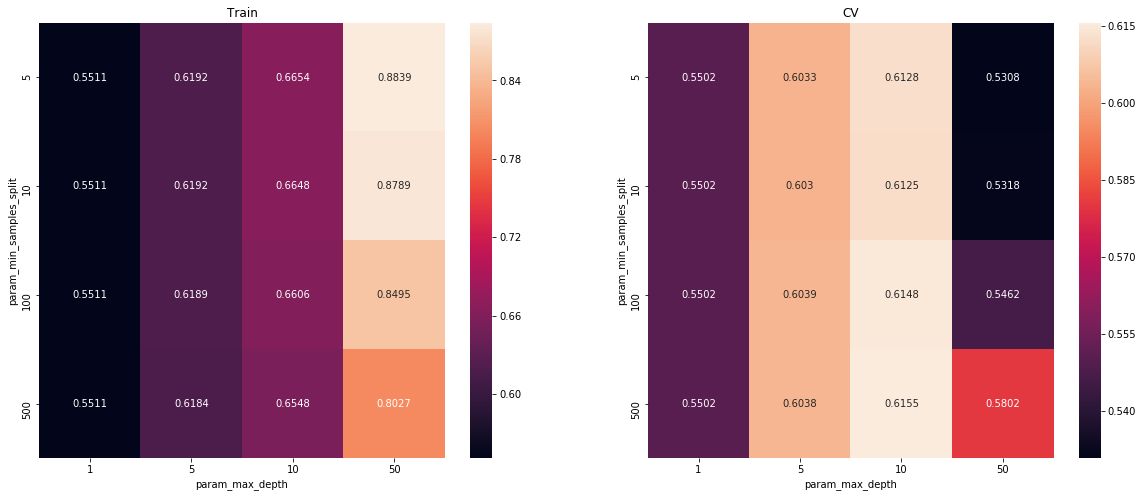

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
results = pd.DataFrame(clf1.cv_results_).groupby(['param_min_samples_split','param_max_depth']).max().unstack()[['mean_test_score','mean_train_score']]
fig,ax = plt.subplots(1,2,figsize=(20,8))
sns.heatmap(results.mean_train_score, annot = True, fmt = '.4g', ax = ax[0])
sns.heatmap(results.mean_test_score,annot = True, fmt = '.4g', ax = ax[1])
ax[0].set_title('Train')
ax[1].set_title('CV')
plt.show()

In [14]:
 #predicted output of train data for Set 1:
y_pred_tr = clf1.predict_proba(X_tr0)[:,1]
print(len(y_pred_tr))
print(len(y_train))

81936
81936


In [15]:
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_train,y_pred_tr)
print("The AUC score of the model w.r.t Training data is = ",auc_score)

The AUC score of the model w.r.t Training data is =  0.652208491648365


In [16]:
from sklearn.metrics import roc_auc_score

In [17]:
# training the model with best parameters
best_clf = DecisionTreeClassifier(max_depth = 10, min_samples_split = 500)
best_clf.fit(X_tr0,y_train)
#printing AUC on test data
y_pred_test0 = best_clf.predict_proba(X_te0)[:,1] #test
y_pred_test_best = best_clf.predict_proba(X_tr0)[:,1] #train
auc_score_test0 = roc_auc_score(y_test,y_pred_test0)
print("AUC score w.r.t test data with best parameters = ",auc_score_test0)

AUC score w.r.t test data with best parameters =  0.6312308973749939


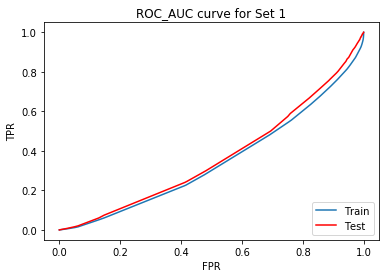

In [18]:
#plotting roc curve on train and test data
from sklearn import metrics
fpr_train0, tpr_train0, thresholds_train0 = metrics.roc_curve(y_train,y_pred_test_best, pos_label=1)
fpr_test0, tpr_test0, thresholds_test0 = metrics.roc_curve(y_test, y_pred_test0, pos_label=1)
import matplotlib.pyplot as plt
plt.plot(tpr_train0,fpr_train0)
plt.plot(tpr_test0,fpr_test0,color='red')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(['Train','Test'],loc=4)
plt.title('ROC_AUC curve for Set 1')
plt.show()

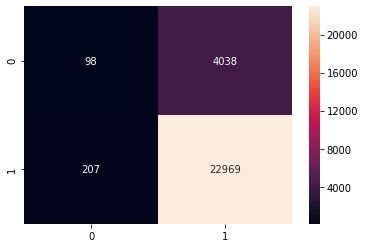

In [19]:
#Printing Confusion matrix of test data:
import seaborn as sns
from sklearn.metrics import confusion_matrix   
y_pred_test = best_clf.predict(X_te0)
results = confusion_matrix(y_test,  y_pred_test)
sns.heatmap(results,annot=True, fmt='d')

In [30]:
import numpy as np
fp = np.logical_and(y_test!=y_pred_test,y_pred_test ==1)       
fp0 = X_test[fp.values]
words=[]
for i in fp0['essay']:
    words.append(str(i).split())

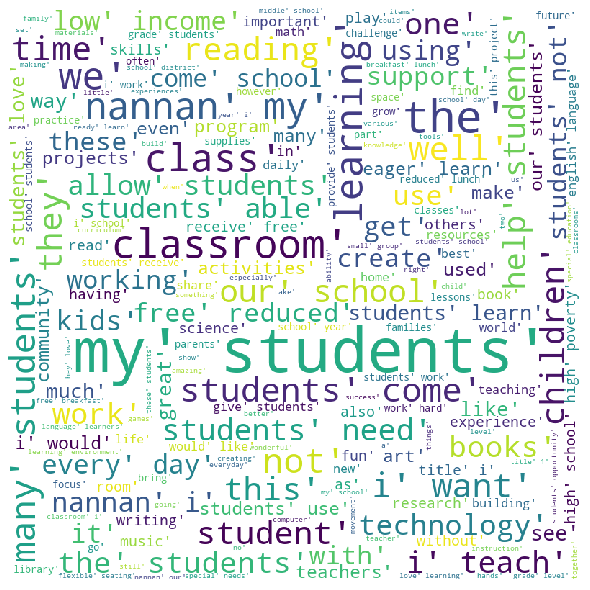

In [31]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
df = pd.DataFrame(data={"col1": words}) #https://stackoverflow.com/questions/2084069/create-a-csv-file-with-values-from-a-python-list
df.to_csv(r"C:\Users\Krithika.WINDOWS-CVA0M52\Desktop\AppliedAI\Decision_Tree\fal_pos.csv", sep=',',index=False)

comment_words = ' '
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df.col1: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

### Box plot of 'price' with 'False Positive' for Set 1

In [32]:
list1 = list(fp.index)

In [33]:
list2=[]
for i in range(len(fp)):
    if fp.iloc[i] == True:
        list2.append(list1[i])

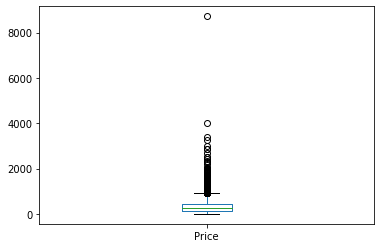

In [34]:
price_X = [X['price'][i] for i in list2]
box_plot_data = pd.DataFrame({'Price':price_X})
ax =box_plot_data.plot.box()


###  PDF with the `teacher_number_of_previously_posted_projects` of these `false positive data points`

In [35]:
teach_prev_X = [X['teacher_number_of_previously_posted_projects'][i] for i in list2]
df_teach = pd.DataFrame(data={"col1": teach_prev_X})
df_teach.to_csv(r"C:\Users\Krithika.WINDOWS-CVA0M52\Desktop\AppliedAI\Decision_Tree\teach.csv", sep=',',index=False)

c:\users\krithika.windows-cva0m52\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  


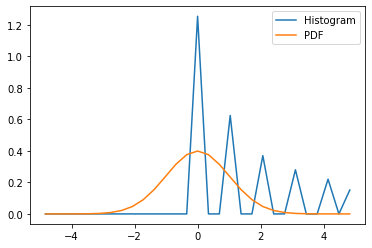

In [36]:
bins = np.linspace(-5, 5, 30) #https://scipy-lectures.org/intro/scipy/auto_examples/plot_normal_distribution.html
histogram, bins = np.histogram(df_teach['col1'], bins=bins, normed=True)

bin_centers = 0.5*(bins[1:] + bins[:-1])
from scipy import stats
pdf = stats.norm.pdf(bin_centers)
plt.figure(figsize=(6, 4))
plt.plot(bin_centers, histogram, label="Histogram")
plt.plot(bin_centers, pdf, label="PDF")
plt.legend()
plt.show()

### SET 2:

In [45]:
depth_range = [1, 5, 10, 50]
min_samples_split_range = [5, 10, 100, 500]
param_grid = {'max_depth' : [1, 5, 10, 50],'min_samples_split' : [5, 10, 100, 500]}
clf_set2 = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring = 'roc_auc',return_train_score='True', cv = 3)
clf_set2.fit(X_tr1,y_train)
d2 = clf_set2.best_params_
print(d2)

{'max_depth': 5, 'min_samples_split': 500}


In [46]:
with open(r'C:\Users\Krithika.WINDOWS-CVA0M52\Desktop\AppliedAI\Decision_Tree\pickle\17.pkl', 'wb') as f:
        pickle.dump(clf_set2, f) 

In [38]:
#run this directly
depth_range = [1, 5, 10, 50]
min_samples_split_range = [5, 10, 100, 500]
param_grid = {'max_depth' : [1, 5, 10, 50],'min_samples_split' : [5, 10, 100, 500]}
with open(r'C:\Users\Krithika.WINDOWS-CVA0M52\Desktop\AppliedAI\Decision_Tree\pickle\17.pkl', 'rb') as f:
        clf_set2=pickle.load(f) 

In [39]:
#predicted output of train data for Set 2:
y_pred_tr2 = clf_set2.predict(X_tr1)
y_pred_tr2_prob = clf_set2.predict_proba(X_tr1)[:,1]
print(len(y_pred_tr2_prob))
print(len(y_train))

81936
81936


In [40]:
from sklearn.metrics import roc_auc_score
auc_score1 = roc_auc_score(y_train,y_pred_tr2_prob)
print("The AUC score of the model w.r.t Training data is = ",auc_score1)

The AUC score of the model w.r.t Training data is =  0.6415841287274203


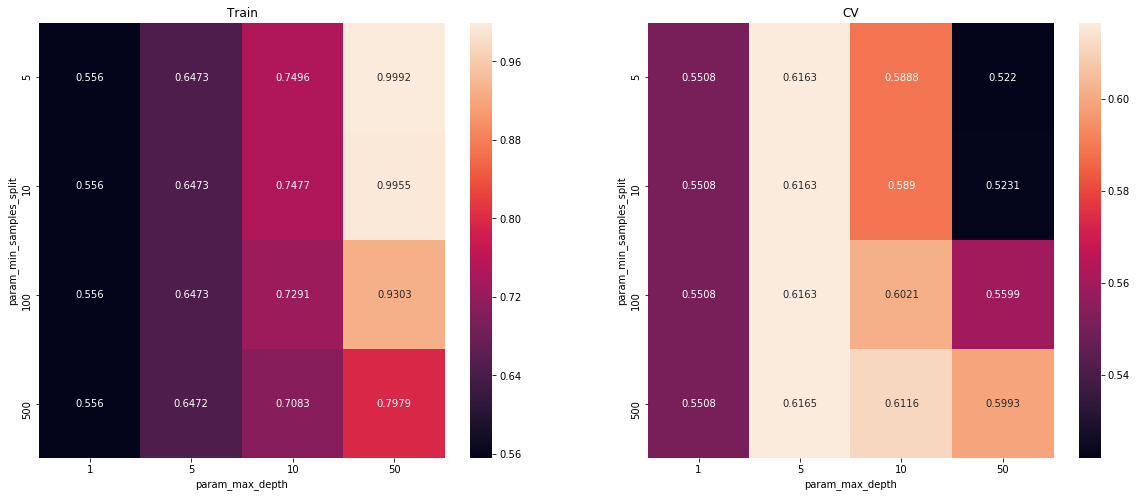

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
results = pd.DataFrame(clf_set2.cv_results_).groupby(['param_min_samples_split','param_max_depth']).max().unstack()[['mean_test_score','mean_train_score']]
fig,ax = plt.subplots(1,2,figsize=(20,8))
sns.heatmap(results.mean_train_score, annot = True, fmt = '.4g', ax = ax[0])
sns.heatmap(results.mean_test_score,annot = True, fmt = '.4g', ax = ax[1])
ax[0].set_title('Train')
ax[1].set_title('CV')
plt.show()

In [42]:
# training the model with best parameters
best_clf2 = DecisionTreeClassifier(max_depth = 5, min_samples_split = 500)
best_clf2.fit(X_tr1,y_train)
#printing AUC on test data
y_pred_test1 = best_clf2.predict_proba(X_te1)[:,1]
auc_score_test1 = roc_auc_score(y_test,y_pred_test1)
print("AUC score w.r.t test data with best parameters = ",auc_score_test1)

AUC score w.r.t test data with best parameters =  0.6255976520848954


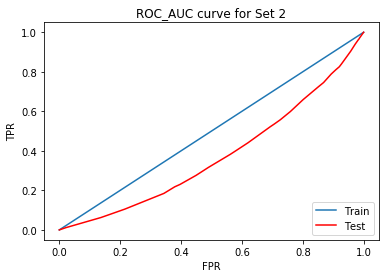

In [43]:
#plotting roc curve on train and test data
fpr_train1, tpr_train1, thresholds_train1 = metrics.roc_curve(y_train,y_pred_tr2, pos_label=1)
fpr_test1, tpr_test1, thresholds_test1 = metrics.roc_curve(y_test, y_pred_test1, pos_label=1)

plt.plot(tpr_train1,fpr_train1)
plt.plot(tpr_test1,fpr_test1,color='red')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(['Train','Test'],loc=4)
plt.title('ROC_AUC curve for Set 2')
plt.show()


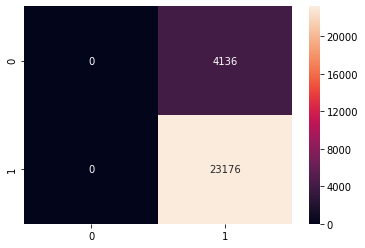

In [44]:
#Printing Confusion matrix of test data:
from sklearn.metrics import confusion_matrix   
y_pred_test_set2 = best_clf2.predict(X_te1)
results = confusion_matrix(y_test,  y_pred_test_set2)
sns.heatmap(results,annot=True, fmt='d')

In [45]:
import numpy as np
fp1 = [];
fp1 = np.logical_and(y_test!=y_pred_test,y_pred_test_set2 ==1)
fp1 = X_test[fp1.values]

In [46]:
words1=[]
for i in fp1['essay']:
    words1.append(str(i).split())

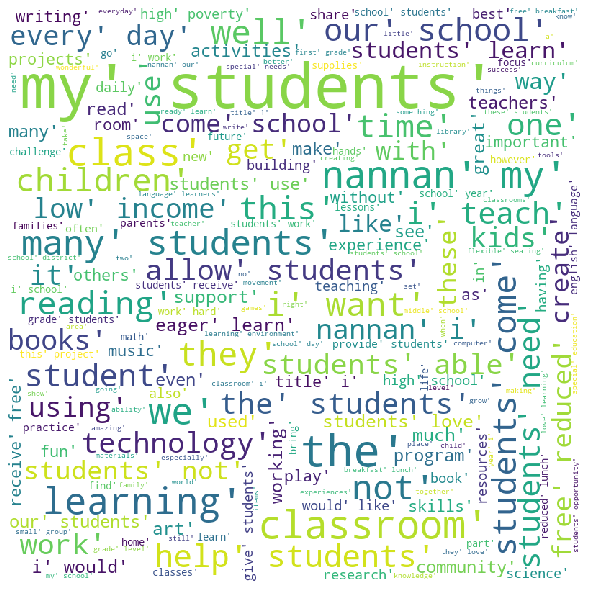

In [47]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
df_set2 = pd.DataFrame(data={"col1": words1}) 
df_set2.to_csv(index=False)
comment_words = ' '
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df_set2.col1: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

#### Box plot of 'price' with 'False Positive' for Set 2

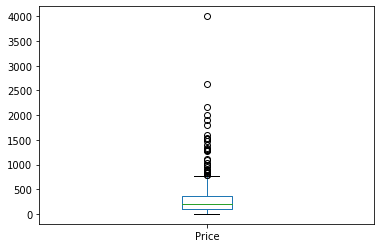

In [48]:
list3 = list(fp1.index)   
list4=[]
for i in range(len(fp1)):
    if fp.iloc[i] == True:
        list4.append(list3[i])
price_X1 = [X['price'][i] for i in list4]
box_plot_data1 = pd.DataFrame({'Price':price_X1})
ax =box_plot_data1.plot.box()

#### PDF with the teacher_number_of_previously_posted_projects of these false positive data points

c:\users\krithika.windows-cva0m52\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:7: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  import sys


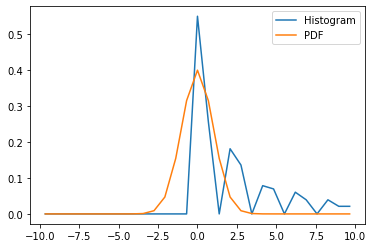

In [49]:
teach_prev_X1 = [X['teacher_number_of_previously_posted_projects'][i] for i in list4]
df_teach1 = pd.DataFrame(data={"col1": teach_prev_X1})
df_teach1.to_csv(index=False)


bins = np.linspace(-10, 10, 30) #https://scipy-lectures.org/intro/scipy/auto_examples/plot_normal_distribution.html
histogram, bins = np.histogram(df_teach1['col1'], bins=bins, normed=True)
bin_centers = 0.5*(bins[1:] + bins[:-1])
from scipy import stats
pdf = stats.norm.pdf(bin_centers)
plt.figure(figsize=(6, 4))
plt.plot(bin_centers, histogram, label="Histogram")
plt.plot(bin_centers, pdf, label="PDF")
plt.legend()
plt.show()

### Task 2:

In [52]:
#param_grid = {max_depth : 5, min_samples_split : 10}
task2_clf = DecisionTreeClassifier(max_depth=10, min_samples_split= 500 ) 
task2_clf.fit(X_tr0,y_train)  
best_feat_ind =[]; best_feat=[];
for i,j in enumerate(task2_clf.feature_importances_):
    if j!=0:
        best_feat_ind.append(i)
        best_feat.append(j)
best_feat_ind 

[99,
 101,
 238,
 478,
 572,
 615,
 617,
 626,
 671,
 784,
 790,
 792,
 850,
 855,
 864,
 907,
 1155,
 1212,
 1298,
 1304,
 1379,
 1406,
 1553,
 1567,
 1696,
 1830,
 1985,
 2051,
 2103,
 2119,
 2371,
 2373,
 2450,
 2499,
 2645,
 2700,
 2715,
 2771,
 2795,
 2826,
 2918,
 3130,
 3161,
 3207,
 3214,
 3218,
 3254,
 3504,
 3527,
 3535,
 3664,
 3675,
 3767,
 4287,
 4303,
 4489,
 4610,
 4624,
 4723,
 4803,
 4871,
 4905,
 4971,
 5054,
 5099,
 5242,
 5243,
 5256,
 5318,
 5396,
 5414,
 5428,
 5436,
 5465,
 5467,
 5480,
 5515,
 5611,
 5623,
 5697,
 5788,
 5797,
 5875,
 5947,
 7240,
 12102]

In [53]:
with open(r'C:\Users\Krithika.WINDOWS-CVA0M52\Desktop\AppliedAI\Decision_Tree\pickle\18.pkl', 'wb') as f:
        pickle.dump(task2_clf, f) 

In [50]:
with open(r'C:\Users\Krithika.WINDOWS-CVA0M52\Desktop\AppliedAI\Decision_Tree\pickle\18.pkl', 'rb') as f:
        task2_clf=pickle.load(f) 
    

In [54]:
best_feat_ind =[]; best_feat=[];
for i,j in enumerate(task2_clf.feature_importances_):
    if j!=0:
        best_feat_ind.append(i)
        best_feat.append(j)

#### New data after feature importance:

In [57]:
all_features = cat_feat1 + cat_feat2 + cat_feat3 + cat_feat4 + cat_feat5 + list(X_train['teacher_number_of_previously_posted_projects'])+list(X_train['price']) + list(vocab_tfidf_essay)

In [58]:
from scipy import sparse
new_matrix = sparse.csr_matrix(X_tr0[:,best_feat_ind])
new_matrix_test = sparse.csr_matrix(X_te0[:,best_feat_ind])

In [20]:
with open(r'C:\Users\Krithika.WINDOWS-CVA0M52\Desktop\AppliedAI\Decision_Tree\pickle\19.pkl', 'wb') as f:
        pickle.dump(new_matrix, f) 
with open(r'C:\Users\Krithika.WINDOWS-CVA0M52\Desktop\AppliedAI\Decision_Tree\pickle\23.pkl', 'wb') as f:
        pickle.dump(new_matrix_test, f) 

In [59]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
depth_range = [1, 5, 10, 50]
min_samples_split_range = [5, 10, 100, 500]
param_grid = {'max_depth' : [1, 5, 10, 50],'min_samples_split' : [5, 10, 100, 500]}

In [58]:
#run this directly
with open(r'C:\Users\Krithika.WINDOWS-CVA0M52\Desktop\AppliedAI\Decision_Tree\pickle\19.pkl', 'rb') as f:
        new_matrix=pickle.load(f) 

In [ ]:
with open(r'C:\Users\Krithika.WINDOWS-CVA0M52\Desktop\AppliedAI\Decision_Tree\pickle\23.pkl', 'rb') as f:
        new_matrix_test=pickle.load(f) 

In [60]:
new_clf = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring = 'roc_auc',verbose=1,return_train_score='True',cv=3)
new_clf.fit(new_matrix,y_train)


Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:  1.3min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [1, 5, 10, 50],
                         'min_samples_split': [5, 10, 100, 500]},
             pre

In [62]:
with open(r'C:\Users\Krithika.WINDOWS-CVA0M52\Desktop\AppliedAI\Decision_Tree\pickle\20.pkl', 'wb') as f:
        pickle.dump(new_clf, f) 

In [8]:
from sklearn.linear_model import LogisticRegression
with open(r'C:\Users\Krithika.WINDOWS-CVA0M52\Desktop\AppliedAI\Decision_Tree\pickle\20.pkl', 'rb') as f:
        new_clf=pickle.load(f)

In [63]:
#predicted output of train data for Set 2:
y_pred_task2 = new_clf.predict(new_matrix)
y_pred_new_clf = new_clf.predict_proba(new_matrix)[:,1]
print(len(y_pred_task2))
print(len(y_train))

81936
81936


In [28]:
from sklearn.metrics import roc_auc_score
auc_score2 = roc_auc_score(y_train,y_pred_new_clf)
print("The AUC score of the model w.r.t Training data is = ",auc_score2)

The AUC score of the model w.r.t Training data is =  0.6540072100139258


In [70]:
new_matrix.shape

(81936, 86)

In [71]:
# training the model with best parameters
new_best_clf = DecisionTreeClassifier(max_depth = 10, min_samples_split = 500)
new_best_clf.fit(new_matrix,y_train)
#printing AUC on test data
y_pred_test3 = new_best_clf.predict_proba(new_matrix_test)[:,1] #test
y_pred_test_best_new = new_best_clf.predict_proba(new_matrix)[:,1] #train
auc_score_test3 = roc_auc_score(y_test,y_pred_test3)
print("AUC score w.r.t test data with best parameters = ",auc_score_test3)

AUC score w.r.t test data with best parameters =  0.6312617874807461


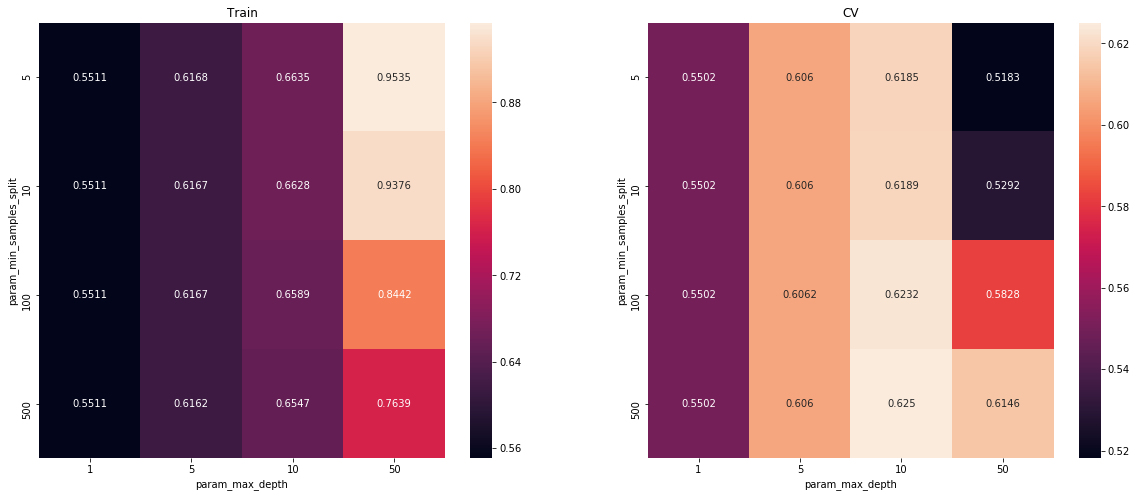

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
results = pd.DataFrame(new_clf.cv_results_).groupby(['param_min_samples_split','param_max_depth']).max().unstack()[['mean_test_score','mean_train_score']]
fig,ax = plt.subplots(1,2,figsize=(20,8))
sns.heatmap(results.mean_train_score, annot = True, fmt = '.4g', ax = ax[0])
sns.heatmap(results.mean_test_score,annot = True, fmt = '.4g', ax = ax[1])
ax[0].set_title('Train')
ax[1].set_title('CV')
plt.show()

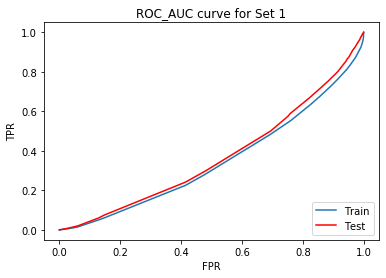

In [67]:
#plotting roc curve on train and test data
from sklearn import metrics
fpr_train_new0, tpr_train_new0, thresholds_train_new0 = metrics.roc_curve(y_train, y_pred_test_best_new, pos_label=1)
fpr_test_new0, tpr_test_new0, thresholds_test_new0 = metrics.roc_curve(y_test, y_pred_test3, pos_label=1)
import matplotlib.pyplot as plt
plt.plot(tpr_train_new0,fpr_train_new0)
plt.plot(tpr_test_new0,fpr_test_new0,color='red')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(['Train','Test'],loc=4)
plt.title('ROC_AUC curve for Set 1')
plt.show()

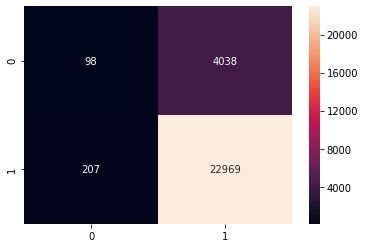

In [73]:
#Printing Confusion matrix of test data:
from sklearn.metrics import confusion_matrix   
from sklearn.metrics import confusion_matrix   
y_pred_test_set_new = new_best_clf.predict(new_matrix_test)
results1 = confusion_matrix(y_test,  y_pred_test_set_new)
sns.heatmap(results1,annot=True, fmt='d')

In [75]:
import numpy as np
fp0 = [];
fp = np.logical_and(y_test!=y_pred_test_set_new,y_pred_test_set_new ==1)
fp0 = X_test[fp.values]
words=[]
for i in fp0['essay']:
    words.append(str(i).split())

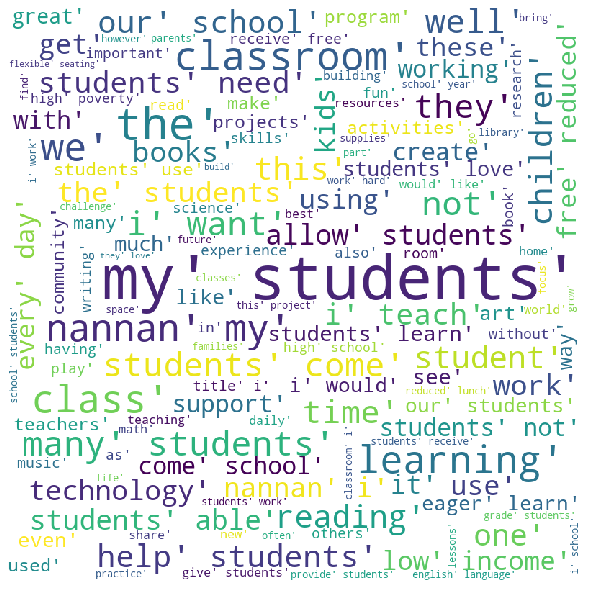

In [76]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
df_set2 = pd.DataFrame(data={"col1": words}) 
df_set2.to_csv(index=False)
comment_words = ' '
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df_set2.col1: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

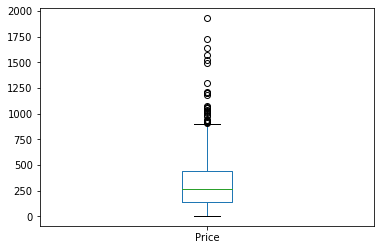

In [79]:
list5 = list(fp.index)   
list6=[]
for i in range(len(fp0)):
    if fp.iloc[i] == True:
        list6.append(list5[i])
price_X1 = [X['price'][i] for i in list6]
box_plot_data1 = pd.DataFrame({'Price':price_X1})
ax =box_plot_data1.plot.box()

In [80]:
teach_prev_X = [X['teacher_number_of_previously_posted_projects'][i] for i in list6]
df_teach = pd.DataFrame(data={"col1": teach_prev_X})
df_teach.to_csv(r"C:\Users\Krithika.WINDOWS-CVA0M52\Desktop\AppliedAI\Decision_Tree\teach.csv", sep=',',index=False)

c:\users\krithika.windows-cva0m52\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  


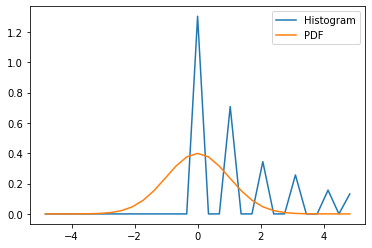

In [81]:
bins = np.linspace(-5, 5, 30) #https://scipy-lectures.org/intro/scipy/auto_examples/plot_normal_distribution.html
histogram, bins = np.histogram(df_teach['col1'], bins=bins, normed=True)

bin_centers = 0.5*(bins[1:] + bins[:-1])
from scipy import stats
pdf = stats.norm.pdf(bin_centers)
plt.figure(figsize=(6, 4))
plt.plot(bin_centers, histogram, label="Histogram")
plt.plot(bin_centers, pdf, label="PDF")
plt.legend()
plt.show()

<h1>2. Summary</h1>

In [82]:
print('='*100)
print('Vectorizer','\t'*2,'Model','\t','Hyperparameter','\t'*4, 'AUC')
print("="*100)
print('Set1', '\t'*2, 'Decision_Tree','\t', 'max_depth = 10, min_samples = 500 ','\t'*2,'0.6312')
print("="*100)
print('Set2','\t'*2,'Decision_Tree','\t','max_depth = 5, min_samples = 500 ','\t'*2,'0.6255')
print("="*100)
print('Task2','\t'*2,'Decision_Tree','\t','max_depth = 10, min_samples = 500','\t'*2,'0.6312' )


Vectorizer 		 Model 	 Hyperparameter 				 AUC
Set1 		 Decision_Tree 	 max_depth = 10, min_samples = 500  		 0.6312
Set2 		 Decision_Tree 	 max_depth = 5, min_samples = 500  		 0.6255
Task2 		 Decision_Tree 	 max_depth = 10, min_samples = 500 		 0.6312
